### Import packages 

In [1]:
import matplotlib.pyplot as plt
import numpy
import warnings

from model import DeepModel
from utils import get_users_and_movies_count, get_ratings_and_links_merged, get_column, get_all_data_merged
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')
% matplotlib inline

Using TensorFlow backend.


### Get ratings data from file

In [2]:
print 'Getting ratings and links...'
ratings_and_links = get_ratings_and_links_merged()

print 'Getting ratings and links...'
all_data = get_all_data_merged()
# print ratings_and_links.shape
# ratings_and_links.head()

Getting ratings and links...
Getting data from /Users/patrykkowalczyk/Desktop/ml-latest-small/ratings.csv
Getting data from /Users/patrykkowalczyk/Desktop/ml-latest-small/links.csv
9066 of the 9066 movies are rated.
671 of the 671 users rate at least one movie.
Getting ratings and links...
Getting data from /Users/patrykkowalczyk/Desktop/ml-latest-small/ratings.csv
Getting data from /Users/patrykkowalczyk/Desktop/ml-latest-small/links.csv
Getting data from /Users/patrykkowalczyk/Desktop/ml-latest-small/movies.csv


### Transform user IDs and movie IDs to have values from range (0, N-1)

In [3]:
n_users, n_movies = get_users_and_movies_count(ratings_and_links)

Number of users: 671
Number of rated movies: 9066


**Train test split**
We'll now split our dataset of 100k ratings into train (containing 80k ratings) and test (containing 20k ratings). Given the train set, we'd like to accurately estimate the ratings in the test set.

### Using neural network

In [ ]:
MODEL_ID = 'TEST'

In [5]:
LATENT_FACTORS_USERS = 120
LATENT_FACTORS_MOVIES = 120
LEARNING_RATE = .005
DROPOUT = .2
TEST_SIZE = .1
RNG_SEED = 1446557

model = DeepModel(n_users, n_movies, user_factors, movie_factors, DROPOUT)
    .add_dense_layer(120) \
    .add_relu_dense_layer(1, 'Activation', None) \
    .build(LEARNING_RATE)

In [ ]:
print 'Training model(ID = %s)' % MODEL_ID
model.fit(shuffled_ratings, 
                epochs=40, 
                override_checkpoint=True, 
                checkpoint_id=colab_model_id, 
                early_stop_patience=1000)

In [83]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(model.history.history['loss']))
print 'Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss))

Minimum RMSE at epoch 16 = 0.8479


In [28]:
import math, pandas as pd
def plot_model_loss(model, model_id, training=True, validation=False):
    loss_dict = {}
    if training:
        loss_dict['%s_training' % model_id] = [math.sqrt(loss) for loss in model.history.history['loss']]
    if validation:
        loss_dict['%s_validation' % model_id] = [math.sqrt(loss) for loss in model.history.history['val_loss']]
    loss_dict['epoch'] = [i + 1 for i in xrange(max(model.history.epoch) + 1)]

    loss = pd.DataFrame(loss_dict)
    loss_reindexed = loss.ix[:, :]
    xticks = list(loss_reindexed.epoch)
    
    ax = loss_reindexed.plot(x='epoch', grid=True, xticks=xticks)
    lgd = ax.legend(bbox_to_anchor=(1.5, .75))
    ax.set_ylabel("root mean squared error")
    ax.set_ylim([0.8, 1.1])
    
    return ax.figure, lgd

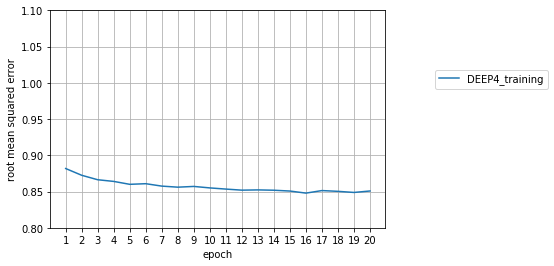

In [58]:
figure, lgd = plot_models_loss(model, MODEL_ID)
# figure.savefig('%s.jpg' % MODEL_ID, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [37]:
Users = get_column(ratings_and_links, 'userId')
Movies = get_column(ratings_and_links, 'movieId')

userId: [  0   0   0 ..., 635 635 635], shape = (100004,)
movieId: [3879  235 4293 ..., 5500 5958 6169], shape = (100004,)
